In [26]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
sp500 = yf.Ticker("^GSPC") 

In [66]:
hist = sp500.history(period="2y", interval="1mo")
hist.index[0].month

5

In [67]:
hist['Month'] = 0
for i in range(len(hist)):
    hist['Month'][i] = hist.index[i].month

/Users/revph/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [68]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Month
Date,,,,,,,,
2019-05-01,2952.330078,2954.129883,2750.520020,2752.060059,76860120000,0,0,5
2019-06-01,2751.530029,2964.149902,2728.810059,2941.760010,70904280000,0,0,6
2019-07-01,2971.409912,3027.979980,2952.219971,2980.379883,70349470000,0,0,7
2019-08-01,2980.320068,3013.590088,2822.120117,2926.459961,79599440000,0,0,8
2019-09-01,2909.010010,3021.989990,2891.850098,2976.739990,73992330000,0,0,9
2019-10-01,2983.689941,3050.100098,2855.939941,3037.560059,77564550000,0,0,10
2019-11-01,3050.719971,3154.260010,3050.719971,3140.979980,72179920000,0,0,11
2019-12-01,3143.850098,3247.929932,3070.330078,3230.780029,72054000000,0,0,12
2020-01-01,3244.669922,3337.770020,3214.639893,3225.520020,77104420000,0,0,1


In [69]:
hist = hist.reset_index()

In [70]:
for i in range(len(hist)):
    month_number = str(hist['Month'][i])
    datetime_object = dt.datetime.strptime(month_number, "%m")
    month_name = datetime_object.strftime("%B")
    hist['Month'][i] = month_name

/Users/revph/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [71]:
hist = hist.set_index('Month')

In [133]:
hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Month,,,,,,,,
May,2019-05-01,2952.330078,2954.129883,2750.520020,2752.060059,76860120000,0,0
June,2019-06-01,2751.530029,2964.149902,2728.810059,2941.760010,70904280000,0,0
July,2019-07-01,2971.409912,3027.979980,2952.219971,2980.379883,70349470000,0,0
August,2019-08-01,2980.320068,3013.590088,2822.120117,2926.459961,79599440000,0,0
September,2019-09-01,2909.010010,3021.989990,2891.850098,2976.739990,73992330000,0,0
October,2019-10-01,2983.689941,3050.100098,2855.939941,3037.560059,77564550000,0,0
November,2019-11-01,3050.719971,3154.260010,3050.719971,3140.979980,72179920000,0,0
December,2019-12-01,3143.850098,3247.929932,3070.330078,3230.780029,72054000000,0,0
January,2020-01-01,3244.669922,3337.770020,3214.639893,3225.520020,77104420000,0,0


In [141]:
hist_2020 = hist.iloc[8:14]
hist_2020

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Month,,,,,,,,
January,2020-01-01,3244.669922,3337.770020,3214.639893,3225.520020,77104420000,0,0
February,2020-02-01,3235.659912,3393.520020,2855.840088,2954.219971,84292270000,0,0
March,2020-03-01,2974.280029,3136.719971,2191.860107,2584.590088,161801100000,0,0
April,2020-04-01,2498.080078,2954.860107,2447.489990,2912.429932,123163450000,0,0
May,2020-05-01,2869.090088,3068.669922,2766.639893,3044.310059,106799100000,0,0
June,2020-06-01,3038.780029,3233.129883,2965.659912,3100.290039,131044000000,0,0


In [142]:
hist_2020 = hist_2020[['Close']].pct_change().dropna()
hist_2020

,Close
Month,
February,-0.084110
March,-0.125119
April,0.126844
May,0.045282
June,0.018388


In [143]:
hist_2020 = hist_2020[['Close']]
hist_2020.columns = ['Percent Change']

In [145]:
hist_2020

,Percent Change
Month,
February,-0.084110
March,-0.125119
April,0.126844
May,0.045282
June,0.018388


In [138]:
twitter_feb = pd.read_csv("emotionGroupsFeb.csv")
twitter_feb

,Unnamed: 0,emotion_str,country,tweet,name,alpha-3,country-code,Country,Users (in million),Source,Total Tweets,tweetpm,date
0,0,anger,Australia,72,Australia,AUS,36,Australia,4.10,Statista,22578.0,17.560976,February
1,1,anger,Belgium,6,Belgium,BEL,56,Belgium,1.00,NaN,2268.0,6.000000,February
2,2,anger,Canada,96,Canada,CAN,124,Canada,8.15,Statista,38382.0,11.779141,February
3,3,anger,China,126,China,CHN,156,China,2.00,NY Times,7482.0,63.000000,February
4,4,anger,France,12,France,FRA,250,France,8.90,Statista,3192.0,1.348315,February
5,5,anger,Germany,24,Germany,DEU,276,Germany,6.10,Statista,4140.0,3.934426,February
6,6,anger,Ghana,54,Ghana,GHA,288,Ghana,2.00,NaN,6312.0,27.000000,February
7,7,anger,Hong Kong,18,Hong Kong,HKG,344,Hong Kong,1.50,NaN,2994.0,12.000000,February
8,8,anger,India,228,India,IND,356,India,13.15,Statista,90480.0,17.338403,February
9,9,anger,Indonesia,24,Indonesia,IDN,360,Indonesia,11.80,NaN,3954.0,2.033898,February


In [9]:
twitter_mar = pd.read_csv("emotionGroupsMarch.csv")
twitter_mar

,Unnamed: 0,emotion_str,country,tweet,name,alpha-3,country-code,Country,Users (in million),Source,Total Tweets,tweetpm,date
0,0,anger,Australia,186,Australia,AUS,36,Australia,5.00,Statista,22578.0,37.200000,March
1,1,anger,Belgium,24,Belgium,BEL,56,Belgium,1.00,NaN,2268.0,24.000000,March
2,2,anger,Brazil,12,Brazil,BRA,76,Brazil,14.35,Statista,1734.0,0.836237,March
3,3,anger,Canada,336,Canada,CAN,124,Canada,8.15,Statista,38382.0,41.226994,March
4,4,anger,China,24,China,CHN,156,China,2.00,NY Times,7482.0,12.000000,March
5,5,anger,France,24,France,FRA,250,France,8.90,Statista,3192.0,2.696629,March
6,6,anger,Germany,30,Germany,DEU,276,Germany,6.10,Statista,4140.0,4.918033,March
7,7,anger,Ghana,126,Ghana,GHA,288,Ghana,2.00,NaN,6312.0,63.000000,March
8,8,anger,Hong Kong,12,Hong Kong,HKG,344,Hong Kong,1.50,NaN,2994.0,8.000000,March
9,9,anger,India,408,India,IND,356,India,13.15,Statista,90480.0,31.026616,March


In [10]:
twitter_apr = pd.read_csv("emotionGroupsApril.csv")
twitter_apr

,Unnamed: 0,emotion_str,country,tweet,name,alpha-3,country-code,Country,Users (in million),Source,Total Tweets,tweetpm,date
0,0,anger,Australia,108,Australia,AUS,36,Australia,5.00,Statista,22578.0,21.600000,April
1,1,anger,Belgium,18,Belgium,BEL,56,Belgium,1.00,NaN,2268.0,18.000000,April
2,2,anger,Brazil,18,Brazil,BRA,76,Brazil,14.35,Statista,1734.0,1.254355,April
3,3,anger,Canada,258,Canada,CAN,124,Canada,8.15,Statista,38382.0,31.656442,April
4,4,anger,China,6,China,CHN,156,China,2.00,NY Times,7482.0,3.000000,April
5,5,anger,France,30,France,FRA,250,France,8.90,Statista,3192.0,3.370787,April
6,6,anger,Germany,54,Germany,DEU,276,Germany,6.10,Statista,4140.0,8.852459,April
7,7,anger,Ghana,96,Ghana,GHA,288,Ghana,2.00,NaN,6312.0,48.000000,April
8,8,anger,Hong Kong,6,Hong Kong,HKG,344,Hong Kong,1.50,NaN,2994.0,4.000000,April
9,9,anger,India,636,India,IND,356,India,13.15,Statista,90480.0,48.365019,April


In [11]:
twitter_may = pd.read_csv("emotionGroupsMay.csv")
twitter_may

,Unnamed: 0,emotion_str,country,tweet,name,alpha-3,country-code,Country,Users (in million),Source,Total Tweets,tweetpm,date
0,0,anger,Australia,66,Australia,AUS,36,Australia,5.00,Statista,22578.0,13.200000,May
1,1,anger,Belgium,6,Belgium,BEL,56,Belgium,1.00,NaN,2268.0,6.000000,May
2,2,anger,Brazil,18,Brazil,BRA,76,Brazil,14.35,Statista,1734.0,1.254355,May
3,3,anger,Canada,168,Canada,CAN,124,Canada,8.15,Statista,38382.0,20.613497,May
4,4,anger,France,12,France,FRA,250,France,8.90,Statista,3192.0,1.348315,May
5,5,anger,Germany,6,Germany,DEU,276,Germany,6.10,Statista,4140.0,0.983607,May
6,6,anger,Ghana,54,Ghana,GHA,288,Ghana,2.00,NaN,6312.0,27.000000,May
7,7,anger,India,372,India,IND,356,India,13.15,Statista,90480.0,28.288973,May
8,8,anger,Indonesia,12,Indonesia,IDN,360,Indonesia,11.80,NaN,3954.0,1.016949,May
9,9,anger,Ireland,84,Ireland,IRL,372,Ireland,2.50,NaN,12138.0,33.600000,May


In [12]:
twitter_jun = pd.read_csv("emotionGroupsJune.csv")
twitter_jun

,Unnamed: 0,emotion_str,country,tweet,date,name,alpha-3,country-code,Country,Users (in million),Source,Total Tweets,tweetpm
0,0,anger,Australia,72,June,Australia,AUS,36,Australia,5.00,Statista,22578.0,14.400000
1,1,anger,Brazil,3,June,Brazil,BRA,76,Brazil,14.35,Statista,1734.0,0.209059
2,2,anger,Canada,111,June,Canada,CAN,124,Canada,8.15,Statista,38382.0,13.619632
3,3,anger,China,6,June,China,CHN,156,China,2.00,NY Times,7482.0,3.000000
4,4,anger,Germany,9,June,Germany,DEU,276,Germany,6.10,Statista,4140.0,1.475410
5,5,anger,Ghana,39,June,Ghana,GHA,288,Ghana,2.00,NaN,6312.0,19.500000
6,6,anger,India,180,June,India,IND,356,India,13.15,Statista,90480.0,13.688213
7,7,anger,Indonesia,12,June,Indonesia,IDN,360,Indonesia,11.80,NaN,3954.0,1.016949
8,8,anger,Ireland,27,June,Ireland,IRL,372,Ireland,2.50,NaN,12138.0,10.800000
9,9,anger,Italy,6,June,Italy,ITA,380,Italy,2.50,NaN,3822.0,2.400000


In [13]:
twitter_df = pd.concat([twitter_feb, twitter_mar, twitter_apr, twitter_may, twitter_jun], axis=0, join='outer')
twitter_df

/Users/revph/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Country,Source,Total Tweets,Unnamed: 0,Users (in million),alpha-3,country,country-code,date,emotion_str,name,tweet,tweetpm
0,Australia,Statista,22578.0,0,4.10,AUS,Australia,36,February,anger,Australia,72,17.560976
1,Belgium,NaN,2268.0,1,1.00,BEL,Belgium,56,February,anger,Belgium,6,6.000000
2,Canada,Statista,38382.0,2,8.15,CAN,Canada,124,February,anger,Canada,96,11.779141
3,China,NY Times,7482.0,3,2.00,CHN,China,156,February,anger,China,126,63.000000
4,France,Statista,3192.0,4,8.90,FRA,France,250,February,anger,France,12,1.348315
5,Germany,Statista,4140.0,5,6.10,DEU,Germany,276,February,anger,Germany,24,3.934426
6,Ghana,NaN,6312.0,6,2.00,GHA,Ghana,288,February,anger,Ghana,54,27.000000
7,Hong Kong,NaN,2994.0,7,1.50,HKG,Hong Kong,344,February,anger,Hong Kong,18,12.000000
8,India,Statista,90480.0,8,13.15,IND,India,356,February,anger,India,228,17.338403
9,Indonesia,NaN,3954.0,9,11.80,IDN,Indonesia,360,February,anger,Indonesia,24,2.033898


In [14]:
twitter_df.to_csv(r'twitter_df.csv')

In [15]:
twitter_df.dropna(inplace=True)
twitter_df


,Country,Source,Total Tweets,Unnamed: 0,Users (in million),alpha-3,country,country-code,date,emotion_str,name,tweet,tweetpm
0,Australia,Statista,22578.0,0,4.10,AUS,Australia,36,February,anger,Australia,72,17.560976
2,Canada,Statista,38382.0,2,8.15,CAN,Canada,124,February,anger,Canada,96,11.779141
3,China,NY Times,7482.0,3,2.00,CHN,China,156,February,anger,China,126,63.000000
4,France,Statista,3192.0,4,8.90,FRA,France,250,February,anger,France,12,1.348315
5,Germany,Statista,4140.0,5,6.10,DEU,Germany,276,February,anger,Germany,24,3.934426
8,India,Statista,90480.0,8,13.15,IND,India,356,February,anger,India,228,17.338403
12,Japan,Statista,4314.0,12,48.45,JPN,Japan,392,February,anger,Japan,6,0.123839
13,Kenya,google,9228.0,13,8.20,KEN,Kenya,404,February,anger,Kenya,30,3.658537
14,Malaysia,Statista,6930.0,14,3.90,MYS,Malaysia,458,February,anger,Malaysia,48,12.307692
16,New Zealand,google,4464.0,16,0.90,NZL,New Zealand,554,February,anger,New Zealand,12,13.333333


In [16]:
twitter_df.drop(["country", "alpha-3", "Unnamed: 0", "country-code", "name", "Source"],axis=1, inplace=True)
twitter_df

,Country,Total Tweets,Users (in million),date,emotion_str,tweet,tweetpm
0,Australia,22578.0,4.10,February,anger,72,17.560976
2,Canada,38382.0,8.15,February,anger,96,11.779141
3,China,7482.0,2.00,February,anger,126,63.000000
4,France,3192.0,8.90,February,anger,12,1.348315
5,Germany,4140.0,6.10,February,anger,24,3.934426
8,India,90480.0,13.15,February,anger,228,17.338403
12,Japan,4314.0,48.45,February,anger,6,0.123839
13,Kenya,9228.0,8.20,February,anger,30,3.658537
14,Malaysia,6930.0,3.90,February,anger,48,12.307692
16,New Zealand,4464.0,0.90,February,anger,12,13.333333


In [17]:
twitter_df.reset_index()

,index,Country,Total Tweets,Users (in million),date,emotion_str,tweet,tweetpm
0,0,Australia,22578.0,4.10,February,anger,72,17.560976
1,2,Canada,38382.0,8.15,February,anger,96,11.779141
2,3,China,7482.0,2.00,February,anger,126,63.000000
3,4,France,3192.0,8.90,February,anger,12,1.348315
4,5,Germany,4140.0,6.10,February,anger,24,3.934426
5,8,India,90480.0,13.15,February,anger,228,17.338403
6,12,Japan,4314.0,48.45,February,anger,6,0.123839
7,13,Kenya,9228.0,8.20,February,anger,30,3.658537
8,14,Malaysia,6930.0,3.90,February,anger,48,12.307692
9,16,New Zealand,4464.0,0.90,February,anger,12,13.333333


In [18]:
twitter_df.set_index('date', inplace=True)

In [19]:
twitter_us = twitter_df.loc[twitter_df['Country']=='United States']

In [20]:
twitter_us.drop(['Country', 'Users (in million)', 'Total Tweets'], axis=1, inplace=True)

/Users/revph/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [98]:
twitter_us = twitter_us.rename(columns={'date':'Month'})

In [99]:
twitter_us

,Month,emotion_str,tweet,tweetpm
0,February,anger,1992,31.028037
1,February,boredom,708,11.028037
2,February,depressed,2496,38.878505
3,February,empty,2874,44.766355
4,February,enthusiasm,2082,32.429907
5,February,fun,2418,37.663551
6,February,hate,16902,263.271028
7,February,relief,2904,45.233645
8,February,sadness,4248,66.168224
9,February,surprise,11220,174.766355


<AxesSubplot:>

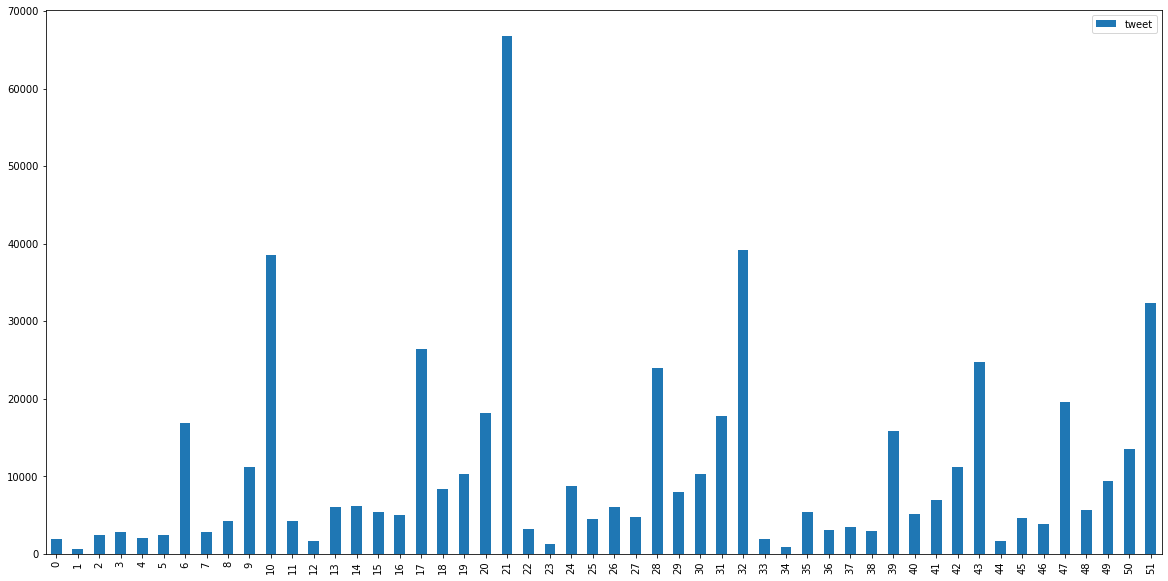

In [100]:
twitter_us.plot.bar(y="tweet", figsize=(20,10))

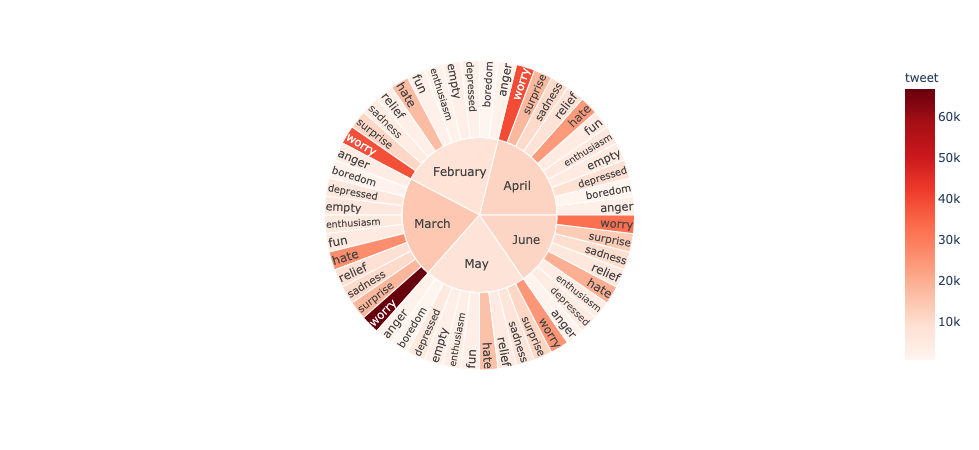

In [113]:
#twitter_us = twitter_us.reset_index()
px.sunburst(twitter_us, path=['Month', 'emotion_str'],
                  color='tweet',
                  color_continuous_scale='reds')

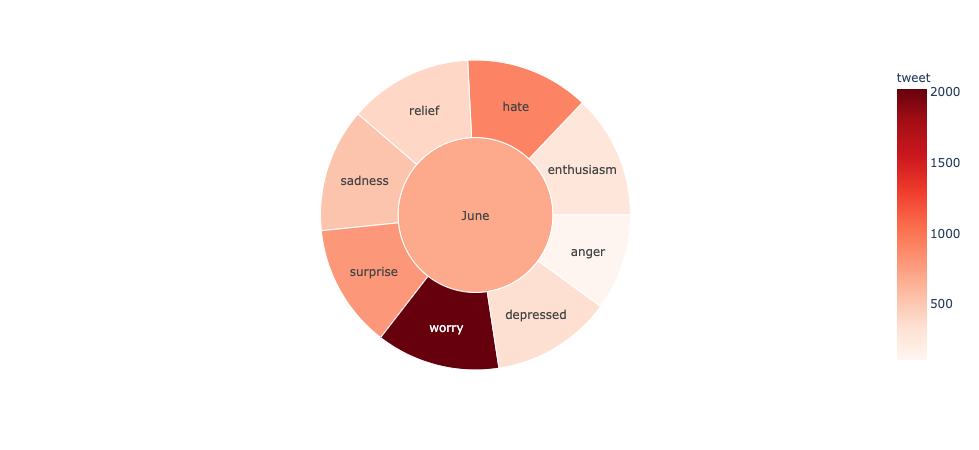

In [103]:
px.sunburst(twitter_jun, path=['date', 'emotion_str'],
                  color='tweet',
                  color_continuous_scale='reds')

In [115]:
twitter_us

,index,Month,emotion_str,tweet,tweetpm
0,0,February,anger,1992,31.028037
1,1,February,boredom,708,11.028037
2,2,February,depressed,2496,38.878505
3,3,February,empty,2874,44.766355
4,4,February,enthusiasm,2082,32.429907
5,5,February,fun,2418,37.663551
6,6,February,hate,16902,263.271028
7,7,February,relief,2904,45.233645
8,8,February,sadness,4248,66.168224
9,9,February,surprise,11220,174.766355


In [139]:
hist_2020.reset_index(inplace=True)

In [146]:
Covid_SP500 = pd.concat([twitter_us, hist_2020], axis=1, join='outer' )
#Covid_SP500.set_index(['Month'])

In [147]:
Covid_SP500

,index,Month,emotion_str,tweet,tweetpm,Percent Change
0,0.0,February,anger,1992.0,31.028037,NaN
1,1.0,February,boredom,708.0,11.028037,NaN
2,2.0,February,depressed,2496.0,38.878505,NaN
3,3.0,February,empty,2874.0,44.766355,NaN
4,4.0,February,enthusiasm,2082.0,32.429907,NaN
5,5.0,February,fun,2418.0,37.663551,NaN
6,6.0,February,hate,16902.0,263.271028,NaN
7,7.0,February,relief,2904.0,45.233645,NaN
8,8.0,February,sadness,4248.0,66.168224,NaN
9,9.0,February,surprise,11220.0,174.766355,NaN


In [151]:
hist_2020 = hist_2020.reset_index()

In [190]:
Covid_SP500 = twitter_us.merge(hist_2020, on='Month')

In [192]:
Covid_SP500_anger = Covid_SP500.loc[Covid_SP500['emotion_str']=='anger']

In [193]:
Covid_SP500_anger.drop('index', axis=1, inplace=True)

/Users/revph/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [196]:
Covid_SP500_anger.set_index(['Month'], inplace=True)

In [198]:
Covid_SP500_anger.corr()

,tweet,tweetpm,Percent Change
tweet,1.000000,1.000000,-0.295865
tweetpm,1.000000,1.000000,-0.295865
Percent Change,-0.295865,-0.295865,1.000000


In [199]:
Covid_SP500_worry = Covid_SP500.loc[Covid_SP500['emotion_str']=='worry']
Covid_SP500_worry.drop('index', axis=1, inplace=True)
Covid_SP500_worry.set_index(['Month'], inplace=True)
Covid_SP500_worry.corr()

,tweet,tweetpm,Percent Change
tweet,1.000000,1.000000,-0.644708
tweetpm,1.000000,1.000000,-0.644708
Percent Change,-0.644708,-0.644708,1.000000


In [200]:
Covid_SP500_fun = Covid_SP500.loc[Covid_SP500['emotion_str']=='fun']
Covid_SP500_fun.drop('index', axis=1, inplace=True)
Covid_SP500_fun.set_index(['Month'], inplace=True)
Covid_SP500_fun.corr()

,tweet,tweetpm,Percent Change
tweet,1.000000,1.000000,0.107621
tweetpm,1.000000,1.000000,0.107621
Percent Change,0.107621,0.107621,1.000000


In [201]:
Covid_SP500_hate = Covid_SP500.loc[Covid_SP500['emotion_str']=='hate']
Covid_SP500_hate.drop('index', axis=1, inplace=True)
Covid_SP500_hate.set_index(['Month'], inplace=True)
Covid_SP500_hate.corr()

,tweet,tweetpm,Percent Change
tweet,1.000000,1.000000,-0.121244
tweetpm,1.000000,1.000000,-0.121244
Percent Change,-0.121244,-0.121244,1.000000


In [202]:
Covid_SP500_empty = Covid_SP500.loc[Covid_SP500['emotion_str']=='empty']
Covid_SP500_empty.drop('index', axis=1, inplace=True)
Covid_SP500_empty.set_index(['Month'], inplace=True)
Covid_SP500_empty.corr()

,tweet,tweetpm,Percent Change
tweet,1.000000,1.000000,-0.265525
tweetpm,1.000000,1.000000,-0.265525
Percent Change,-0.265525,-0.265525,1.000000


In [204]:
Covid_SP500_depressed = Covid_SP500.loc[Covid_SP500['emotion_str']=='depressed']
Covid_SP500_depressed.drop('index', axis=1, inplace=True)
Covid_SP500_depressed.set_index(['Month'], inplace=True)
Covid_SP500_depressed.corr()

,tweet,tweetpm,Percent Change
tweet,1.000000,1.000000,0.624223
tweetpm,1.000000,1.000000,0.624223
Percent Change,0.624223,0.624223,1.000000


In [205]:
Covid_SP500_sadness = Covid_SP500.loc[Covid_SP500['emotion_str']=='sadness']
Covid_SP500_sadness.drop('index', axis=1, inplace=True)
Covid_SP500_sadness.set_index(['Month'], inplace=True)
Covid_SP500_sadness.corr()

,tweet,tweetpm,Percent Change
tweet,1.000000,1.000000,0.275076
tweetpm,1.000000,1.000000,0.275076
Percent Change,0.275076,0.275076,1.000000


In [206]:
Covid_SP500_boredom = Covid_SP500.loc[Covid_SP500['emotion_str']=='boredom']
Covid_SP500_boredom.drop('index', axis=1, inplace=True)
Covid_SP500_boredom.set_index(['Month'], inplace=True)
Covid_SP500_.corr()

,tweet,tweetpm,Percent Change
tweet,1.00000,1.00000,-0.21101
tweetpm,1.00000,1.00000,-0.21101
Percent Change,-0.21101,-0.21101,1.00000


In [207]:
Covid_SP500_enthusiasm = Covid_SP500.loc[Covid_SP500['emotion_str']=='enthusiasm']
Covid_SP500_enthusiasm.drop('index', axis=1, inplace=True)
Covid_SP500_enthusiasm.set_index(['Month'], inplace=True)
Covid_SP500_enthusiasm.corr()

,tweet,tweetpm,Percent Change
tweet,1.000000,1.000000,0.325195
tweetpm,1.000000,1.000000,0.325195
Percent Change,0.325195,0.325195,1.000000


In [208]:
Covid_SP500_relief = Covid_SP500.loc[Covid_SP500['emotion_str']=='relief']
Covid_SP500_relief.drop('index', axis=1, inplace=True)
Covid_SP500_relief.set_index(['Month'], inplace=True)
Covid_SP500_relief.corr()

,tweet,tweetpm,Percent Change
tweet,1.000000,1.000000,0.173717
tweetpm,1.000000,1.000000,0.173717
Percent Change,0.173717,0.173717,1.000000
